In [1]:
import sys
sys.path.append("Modules")

from loop import *

INO=Arduino('COM3')

time.sleep(10)
ChnSelect = [True, True, False, True, True, False]
ChnPrefix=['TN2', 'TP6', '', 'TP10', 'TP1','']
ptype= [False, True, True, True, True, True]
print("Ino conn")

Ino conn


Chn1 measure: True
Measuring TN2, ptype: False       23/11/01 14:03:03
Open INO: ch1


VisaIOError: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.

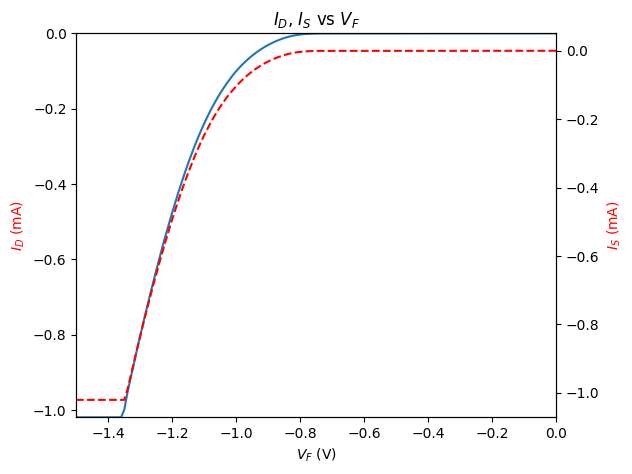

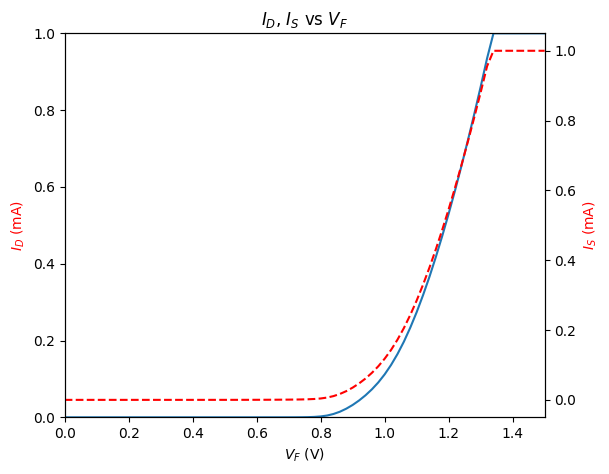

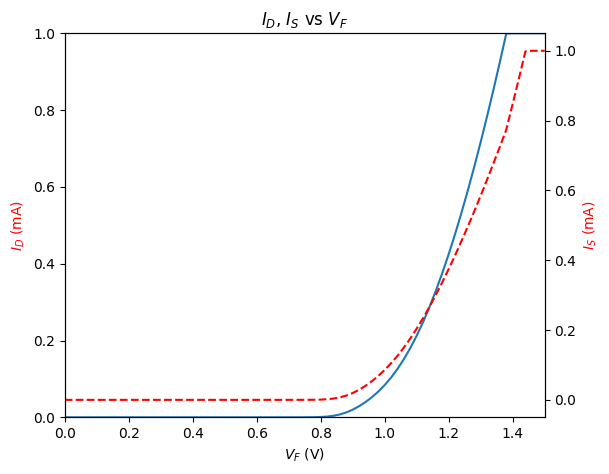

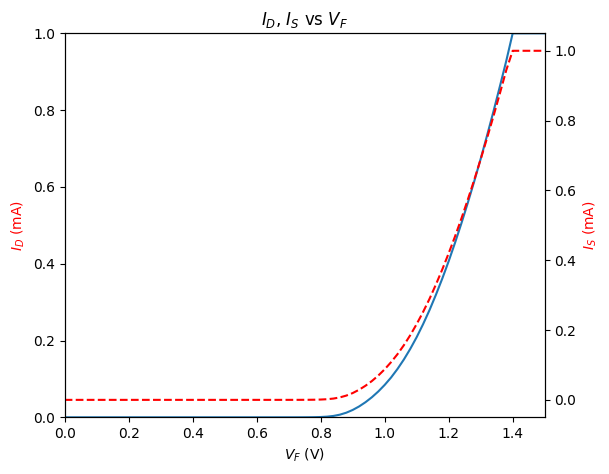

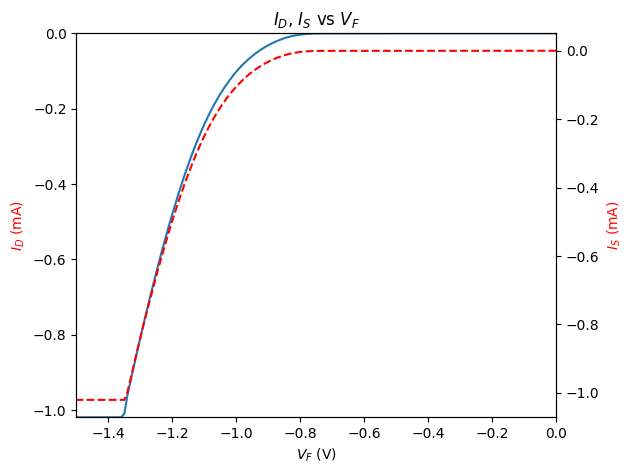

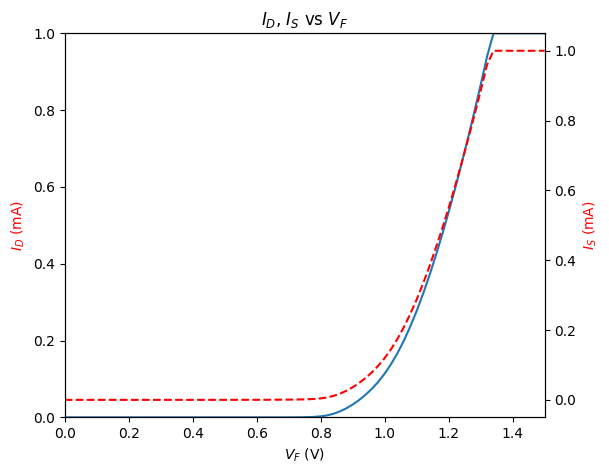

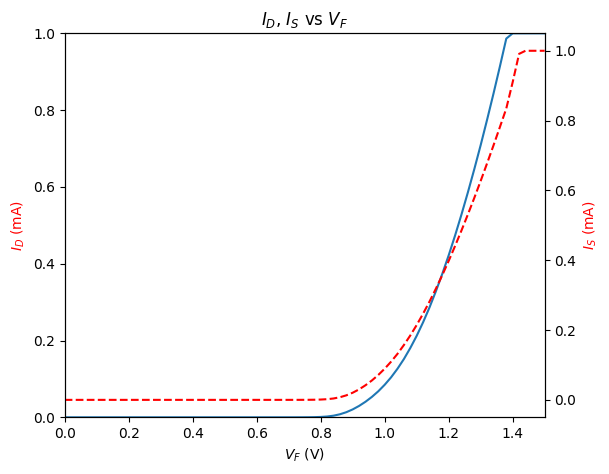

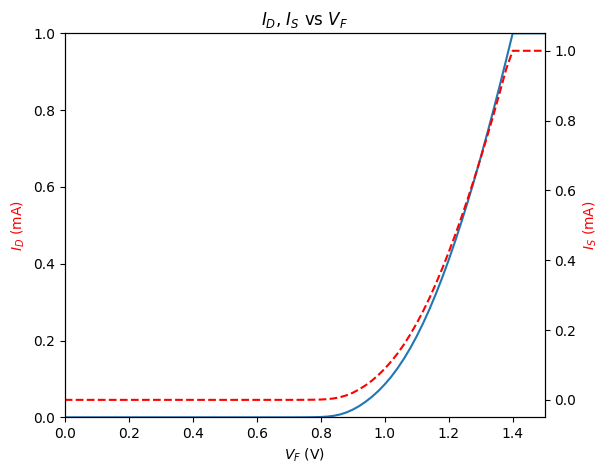

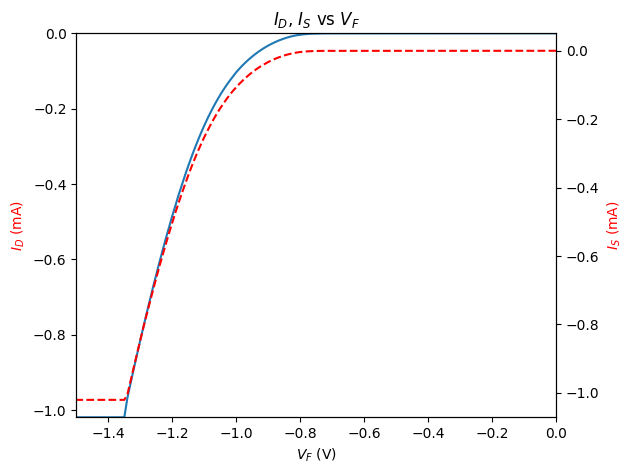

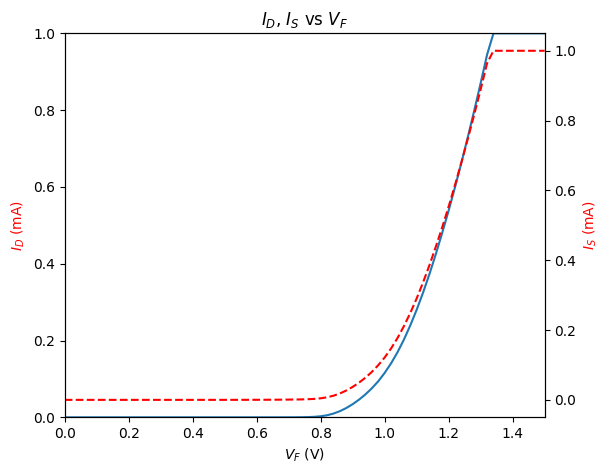

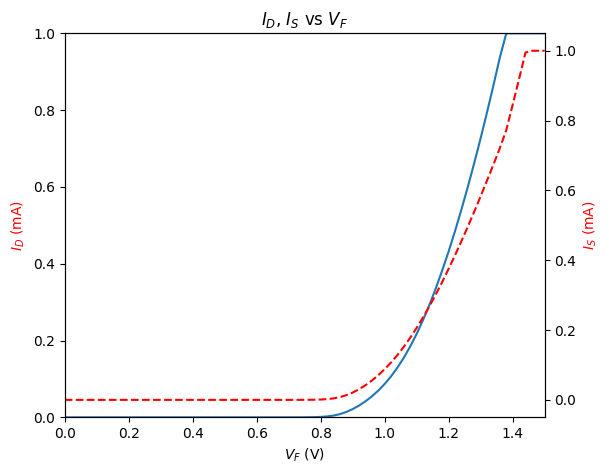

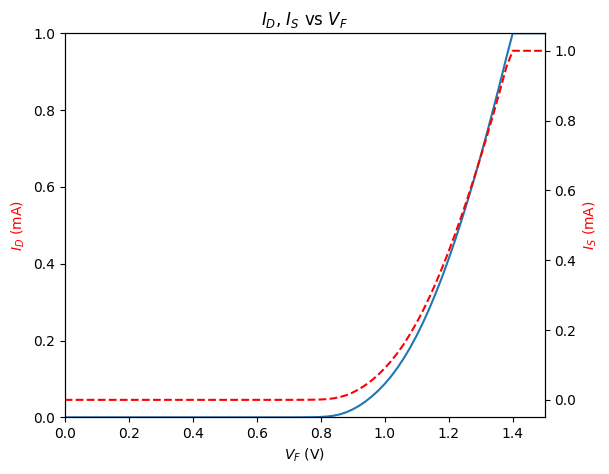

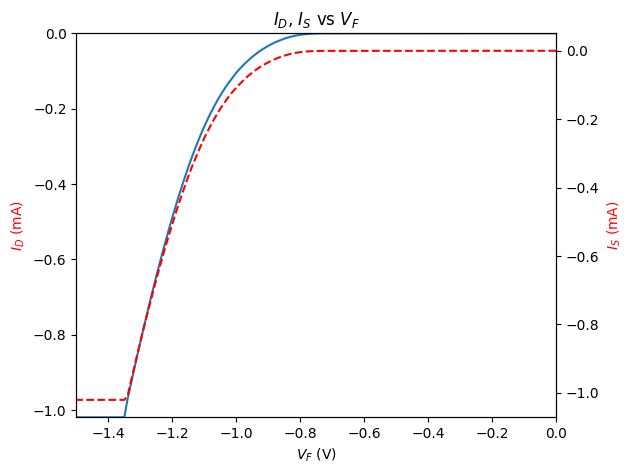

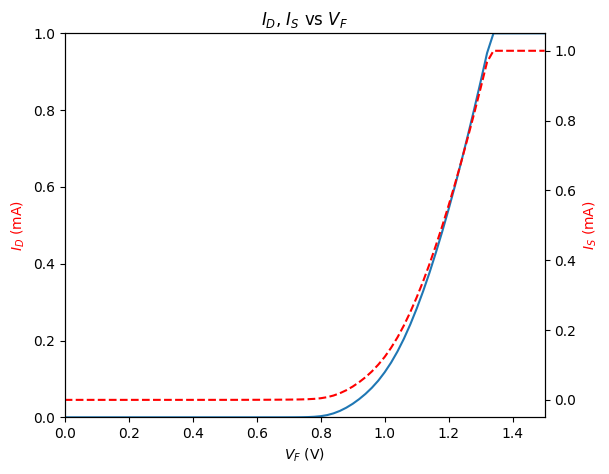

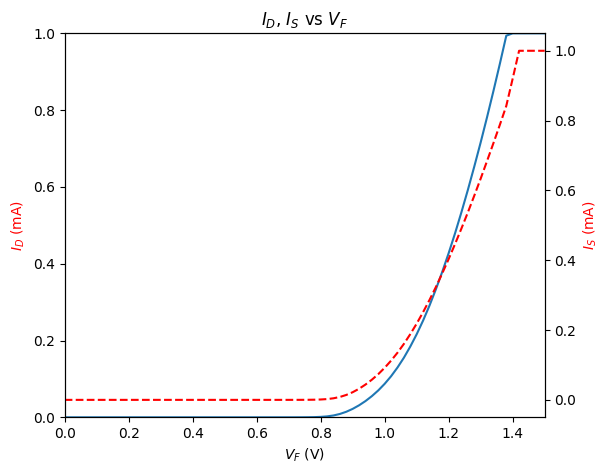

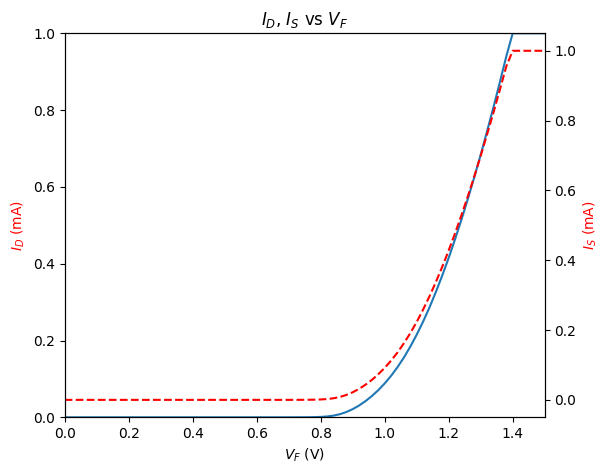

In [2]:
for i in range(6):
    clear_output(wait=True)

    progress="Waiting"
    
    for j in range(60):
        if datetime.datetime.now().time().minute%30 == 0: break
        if j%2==0:
            clear_output(wait=True)
            print(f"Waiting {datetime.datetime.now().strftime('%H:%M')}")
        time.sleep(30)

    print(f"Measurement: {i+1}")
    start=datetime.datetime.now().strftime("%y%m%d %H-%M")
    
    for n, Chn in enumerate(ChnSelect):
        clear_output(wait=True)
        print(f"Chn{n+1} measure: {Chn}")
        if Chn:
            printf(f"Measuring {ChnPrefix[n]}, ptype: {ptype[n]}       {datetime.datetime.now().strftime('%y/%m/%d %H:%M:%S')}", start, True)
            INO.opench(n+1)
            loop(ChnPrefix[n], ptype[n], start)
            printf('', start, True)
    
    now=datetime.datetime.now().strftime("%y/%m/%d %H:%M:%S")